Esperando a que se ejecuten las estadísticas de publicaciones cada viernes a las 23:59...


C:\Users\Usuario\AppData\Local\Temp\ipykernel_18160\2080364629.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18160\2080364629.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_18160\2080364629.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Gràfiques generades i guardades amb el nom de la data actual a 'images/statistics/publications'.


KeyboardInterrupt: 

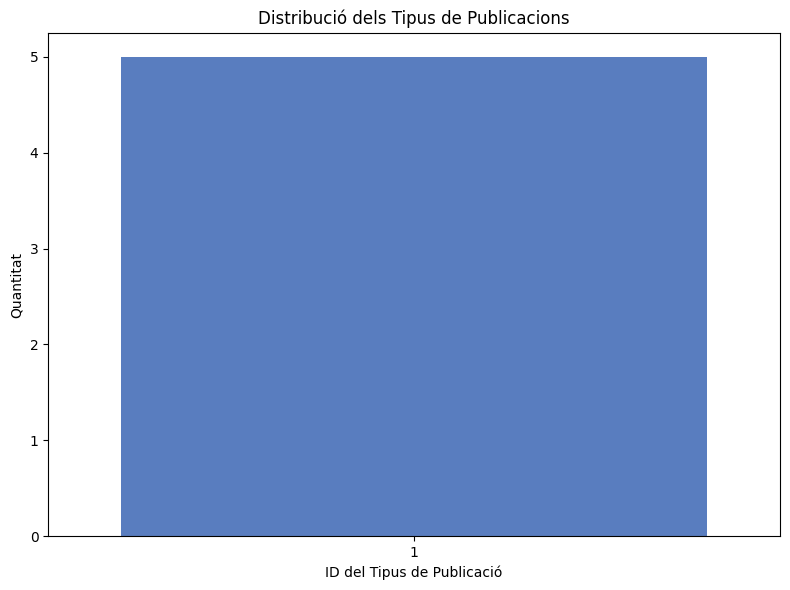

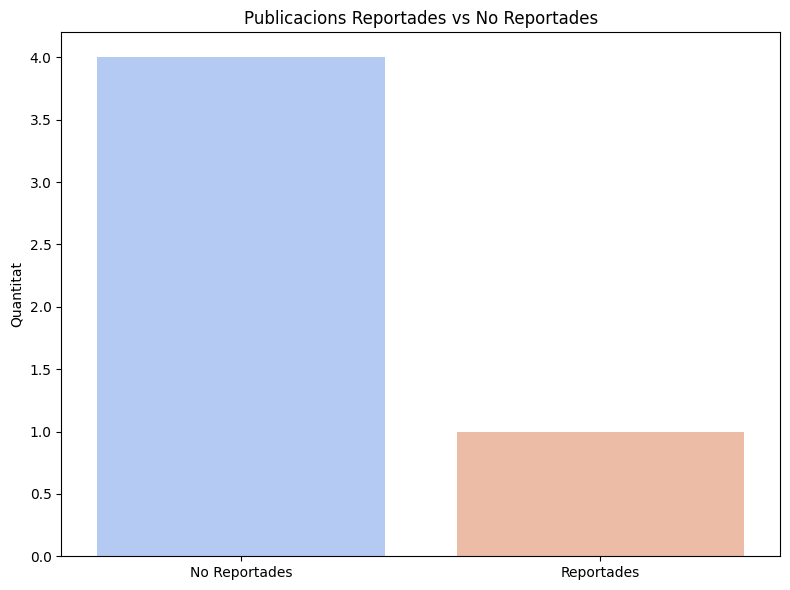

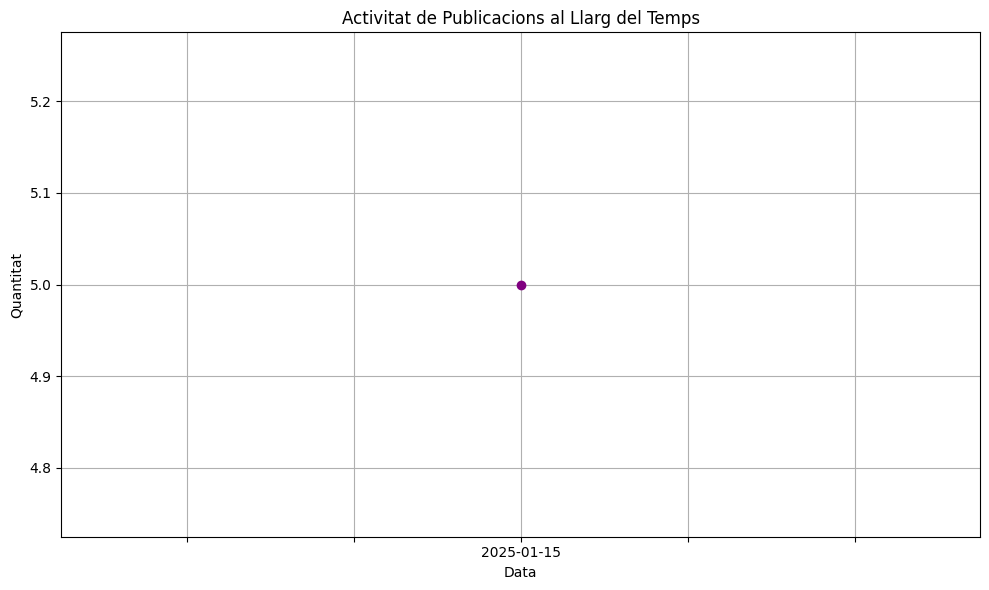

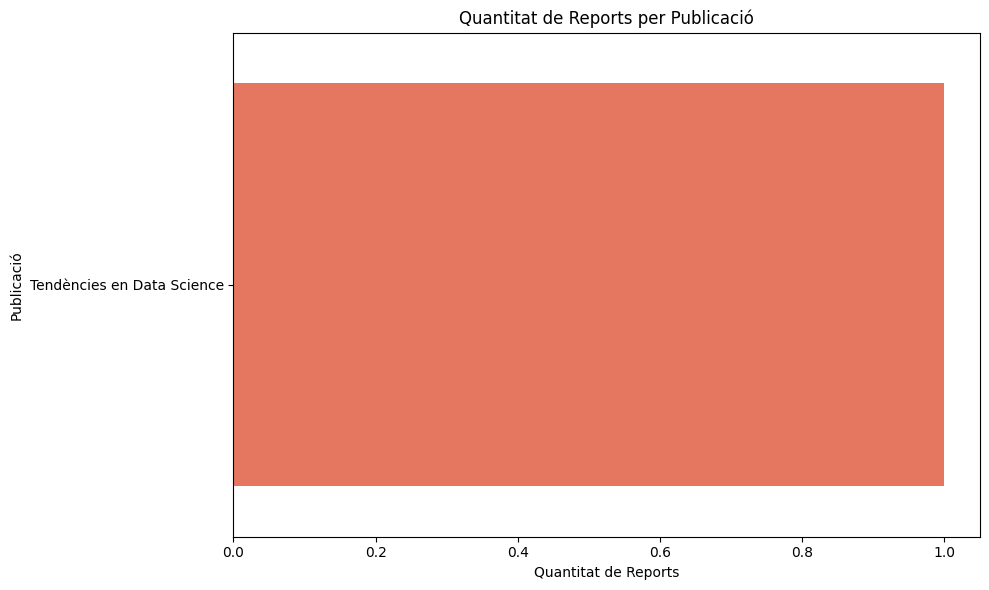

In [1]:
import schedule
import time
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
from datetime import datetime
import pandas as pd

def generate_publication_statistics():
    # Obtener los datos desde el servidor
    url = "http://localhost:3000/publications"
    response = requests.get(url)

    # Verificar si la solicitud fue exitosa
    if response.status_code != 200:
        raise Exception(f"Error al hacer el fetch: {response.status_code}")

    # Parsear los datos JSON
    publications = response.json()

    # Crear listas con datos relevantes
    types_publications = [pub['typesPublications_id'] for pub in publications]
    reports = [pub['reports'] for pub in publications]
    created_dates = [pub['created_at'].split('T')[0] for pub in publications]

    # Crear carpeta para guardar las gráficas
    current_date = datetime.now().strftime("%Y-%m-%d")
    os.makedirs(f"images/statistics/publications/{current_date}", exist_ok=True)

    # Gráfica 1: Distribución de tipos de publicaciones
    types_counts = Counter(types_publications)
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x=list(types_counts.keys()),
        y=list(types_counts.values()),
        palette="muted"
    )
    plt.title("Distribució dels Tipus de Publicacions")
    plt.xlabel("ID del Tipus de Publicació")
    plt.ylabel("Quantitat")
    plt.tight_layout()
    plt.savefig(f"images/statistics/publications/{current_date}/types_distribution.png")

    # Gráfica 2: Publicaciones reportadas vs no reportadas
    reported_counts = {
        "No Reportades": len([r for r in reports if r == 0]),
        "Reportades": len([r for r in reports if r > 0])
    }
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x=list(reported_counts.keys()),
        y=list(reported_counts.values()),
        palette="coolwarm"
    )
    plt.title("Publicacions Reportades vs No Reportades")
    plt.ylabel("Quantitat")
    plt.tight_layout()
    plt.savefig(f"images/statistics/publications/{current_date}/reported_vs_non_reported.png")

    # Gráfica 3: Actividad de publicaciones a lo largo del tiempo
    if created_dates:
        date_counts = pd.Series(created_dates).value_counts().sort_index()
        plt.figure(figsize=(10, 6))
        date_counts.plot(kind='line', marker='o', color='purple')
        plt.title("Activitat de Publicacions al Llarg del Temps")
        plt.xlabel("Data")
        plt.ylabel("Quantitat")
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"images/statistics/publications/{current_date}/activity_over_time.png")

    # Gráfica 4: Cantidad de reportes por publicación
    if any(r > 0 for r in reports):
        reports_by_publication = {pub['title']: pub['reports'] for pub in publications if pub['reports'] > 0}
        plt.figure(figsize=(10, 6))
        sns.barplot(
            x=list(reports_by_publication.values()),
            y=list(reports_by_publication.keys()),
            palette="Reds",
            orient="h"
        )
        plt.title("Quantitat de Reports per Publicació")
        plt.xlabel("Quantitat de Reports")
        plt.ylabel("Publicació")
        plt.tight_layout()
        plt.savefig(f"images/statistics/publications/{current_date}/reports_by_publication.png")

    print(f"Gràfiques generades i guardades amb el nom de la data actual a 'images/statistics/publications'.")

# Programar la tarea para que se ejecute los viernes a las 23:59
schedule.every().wednesday.at("23:59").do(generate_publication_statistics)

print("Esperando a que se ejecuten las estadísticas de publicaciones cada viernes a las 23:59...")

# Mantener el programa en ejecución
while True:
    schedule.run_pending()
    time.sleep(1)
